
# Introduction to Scikit-Learn(sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit_Learn library

What we're going to cover

0. An end to end Scikit Learn workflow
1. Getting the data ready
2. Choose the right estimator/ algorithm for our problem
3. Fit the model/ algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. An end to end Scikit Learn workflow

In [1]:
# GEt the data ready
import pandas as pd 
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X , X will take all parameters except target
X = heart_disease.drop("target", axis=1) #axis=1 indicates that you want to drop a column from the DataFrame heart_disease.
#In pandas, the axis parameter is used to specify whether you want to operate on rows (axis=0) or columns (axis=1).
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [3]:
# Now let us assign target to y
# Create y label
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # need to documentate the purpose of n_estimators
# We'll keep the default parameter
clf.get_params() # return the current parameters of the classifier in our case (RandomForestClassifier)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to tge training data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2);

In [6]:
clf.fit(X_train, y_train);

In [7]:
# MAke a prediction
y_predict = clf.predict(X_test)
y_predict # Outout of our predictions


array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [8]:
# Evaluate the model score on the training data and the test data
clf.score(X_train, y_train)


1.0

In [9]:
clf.score(X_test, y_test) # the accuracy of our model learning 

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict))


# # The output you provided is from the `classification_report` function in scikit-learn, which provides a comprehensive summary 
# of various classification metrics.

 # Here's an explanation of each section:

# # 1. **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
#     In this report, it's given for each class (0 and 1). For class 0, it's 0.84, which means 84% of the instances predicted as class 0 were actually class 0. For class 1, it's 0.86, meaning 86% of the instances predicted as class 1 were actually class 1.

# # 2. **Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
# In this report, it's given for each class (0 and 1). For class 0, it's 0.81, which means 81% of the actual class 0 instances were predicted correctly.
# For class 1, it's 0.89, indicating 89% of the actual class 1 instances were predicted correctly.

# # 3. **F1-score**: F1-score is the weighted average of Precision and Recall. It's a good measure of a model's accuracy, 
# especially if the classes are imbalanced. It ranges from 0 to 1, with 1 being the best value. In this report, 

# it's given for each class (0 and 1) as well as the macro average and weighted average. 
# The macro average takes the unweighted mean of precision and recall for both classes. 
# The weighted average considers the number of instances for each class.

# # 4. **Support**: Support is the number of actual occurrences of the class in the specified dataset. 
# In this report, it's given for each class (0 and 1).

# # 5. **Accuracy**: Accuracy is the ratio of correctly predicted observation to the total observations. 
# In this report, it's the overall accuracy of the model across all classes. 
# It's 0.85, meaning 85% of the instances were correctly classified by the model.

# # Overall, this report gives you a good understanding of how well your classifier is performing for each class and in general.

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [11]:
print(confusion_matrix(y_test, y_predict))

[[22  6]
 [ 4 29]]


In [12]:
print(accuracy_score(y_test, y_predict))

0.8360655737704918


In [13]:
# 5. Improve the model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators ...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")

    print("")

Trying model with 10 estimators ...
Model accuracy on test set: 80.33%

Trying model with 20 estimators ...
Model accuracy on test set: 83.61%

Trying model with 30 estimators ...
Model accuracy on test set: 80.33%

Trying model with 40 estimators ...
Model accuracy on test set: 81.97%

Trying model with 50 estimators ...
Model accuracy on test set: 83.61%

Trying model with 60 estimators ...
Model accuracy on test set: 81.97%

Trying model with 70 estimators ...
Model accuracy on test set: 85.25%

Trying model with 80 estimators ...
Model accuracy on test set: 85.25%

Trying model with 90 estimators ...
Model accuracy on test set: 81.97%



In [14]:
#6. Save model and load it 
import pickle
pickle.dump(clf, open("random_forest_model.pkl", "wb"))
# Pickle is a module in Python that allows you to serialize and deserialize Python objects. Serialization is the process of converting a Python object
# into a byte stream, which can then be saved to a file or sent over a network. Deserialization is the reverse process, 
# where the byte stream is converted back into a Python object.

# The pickle.dump() function is used to serialize a Python object and save it to a file.
# It takes two arguments: the object to be serialized and a file object opened in binary write mode ("wb").

In [15]:
loaded_model= pickle.load(open("random_forest_model.pkl","rb")) # rb stands for read binary
loaded_model.score(X_test, y_test)

0.819672131147541

## Getting our data ready to be used machine learning

Three main things we have to do:
	1. Split the data into features and labels (usually `X` & `Y`)
	2. Filling (also called imputing) or disregarding missing values
	3. Converting non-numerical values to numerical values (also called feature encoding)`

In [16]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt

In [17]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease
# Create X , X will take all parameters except target
X = heart_disease.drop("target", axis=1) #axis=1 indicates that you want to drop a column from the DataFrame heart_disease.
#In pandas, the axis parameter is used to specify whether you want to operate on rows (axis=0) or columns (axis=1).
X
# Now let us assign target to y
# Create y label
y = heart_disease["target"]
y
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2);

### 1.1 Make sure it's ll numerical 

In [18]:
car_sales = pd.read_csv("data/car-sales-extended.csv")

In [19]:
car_sales.head()
#len(car_sales)


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
# Split into training and set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
print (len(X_train), len(X_test), len(y_test), len(y_train))


800 200 200 800


In [21]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor   #RandomForestRegressor can predict number
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [22]:
# Above we are having errors because we are having errors because our data is having string 
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# here we are assigning the value that we want to use with OneHotEncoder . If u want to understand the OneHotEncoder confert the picture
categorical_features = ["Make", "Colour", "Doors"]
# Passing the function OneHotEncoder into a variable
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",   # "one_hot" I can change the name anytime depending to me :)
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [23]:
# Here is a detailled explanation of the above code to transform ["Make", "Colour", "Doors"]
# But at the end we will notice that it won't work on Doors because it is numerical (it is what I think but need to demonstrate it )
# This code snippet is using scikit-learn's `OneHotEncoder` and `ColumnTransformer` to transform categorical variables into numerical representations. Here's a breakdown of each part:

# 1. **Importing Necessary Libraries**:
#     ```python
#     from sklearn.preprocessing import OneHotEncoder
#     from sklearn.compose import ColumnTransformer
#     ```

#     This imports the `OneHotEncoder` class from the `sklearn.preprocessing` module and the `ColumnTransformer` class from the `sklearn.compose` module. These classes are used for one-hot encoding categorical variables and applying transformations to multiple columns, respectively.

# 2. **Defining Categorical Features**:
#     ```python
#     categorical_features = ["Make", "Colour", "Doors"]
#     ```

#     This line specifies the names of the categorical columns in your dataset that you want to encode.

# 3. **Creating a OneHotEncoder Object**:
#     ```python
#     one_hot = OneHotEncoder()
#     ```

#     This line creates an instance of the `OneHotEncoder` class. This object will be used to perform one-hot encoding on the categorical features.

# 4. **Creating a ColumnTransformer**:
#     ```python
#     transformer = ColumnTransformer([("one_hot",
#                                       one_hot,
#                                       categorical_features)],
#                                     remainder="passthrough")
#     ```

#     Here, a `ColumnTransformer` object is created. It takes a list of tuples, where each tuple contains a name for the transformation (in this case, "one_hot"), the transformer object (`one_hot`), and the columns to apply the transformation to (`categorical_features`). The `remainder="passthrough"` parameter ensures that any columns not specified in `categorical_features` will be passed through without any transformations.

# 5. **Transforming the Data**:
#     ```python
#     transformer_X = transformer.fit_transform(X)
#     ```

#     This line applies the transformation defined by the `ColumnTransformer` to the input data `X`. It fits the transformer to the data and transforms it, resulting in a new array `transformer_X` where the categorical features are one-hot encoded, and the non-categorical features are left unchanged.

# Overall, this code sets up a transformation pipeline to encode categorical features in your dataset into a numerical format suitable for machine learning models.

In [24]:
pd.DataFrame(transformer_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [25]:
X
# As we make (Make, Colour and Doors) as categories tat why we are having the output above

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [26]:
# dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]], dtype=int)
# as we can seee the default valur of dummies is in boolean

# pd.get_dummies() is a Pandas function that converts categorical variables into dummy/indicator variables (i.e., one-hot encoding).
# It creates a new DataFrame where each categorical variable is replaced by a set of binary columns representing the presence
# or absence of each category.


dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [27]:
# Let's refit the model
# np.random.seed(42)

X_train, X_test, y_train, y_test= train_test_split(transformer_X,y, test_size=0.2)
#print (len(X_train), len(X_test), len(y_test), len(y_train))
model.fit(X_train, y_train);

In [28]:
model.score(X_test, y_test)

0.2330485230539474


### 1.2 What if there were missing values
1. Fill them with some value(also known as imputation)
2. Remove the samples with missing data altogether

In [29]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [30]:
# Here we are using isna function to see how many values are missing 
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [31]:
X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [32]:
#Let's try and convert our data to numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# here we are assigning the value that we want to use with OneHotEncoder . If u want to understand the OneHotEncoder confert the picture
categorical_features = ["Make", "Colour", "Doors"]
# Passing the function OneHotEncoder into a variable
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",   # "one_hot" I can change the name anytime depending to me :)
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [33]:
# Just a quick update on the next video to keep in mind.

# In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values.

# However, since the video was recorded with an older version of Scikit-Learn, this upgrade isn't shown.

In [34]:
car_sales_missing["Doors"].value_counts()
# We are counting the number of iterations based ion the number of doors

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

### OPtion1 Filing missing data with pandas

In [35]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace=True)
# Fill the "Colour" column 
car_sales_missing["Colour"].fillna("missing", inplace=True)
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_9072\739670523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\kevin\AppData\Local\Temp\ipykernel_9072\739670523.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [36]:
# The warnings you're seeing are related to a change in behavior that will happen in the future version of pandas (version 3.0). The warnings indicate that the way you're using the `inplace=True` argument with the `fillna` method might not work as expected in the future version of pandas.

# The issue is that when you use `df[col].method(args, inplace=True)`, pandas creates a copy of the column `col`, performs the operation on the copy, and then tries to set the result back into the original DataFrame `df`. However, this "chained assignment" does not actually modify the original DataFrame.

# To resolve this issue and avoid the warnings, you can use one of the following approaches:

# 1. **Use the recommended syntax for pandas 3.0**:

# ```python
# car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
# car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
# car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())
# car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)
# ```

# 2. **Use the `df.method({col: value}, inplace=True)` syntax**:

# ```python
# car_sales_missing.fillna({"Make": "missing", "Colour": "missing", "Odometer (KM)": car_sales_missing["Odometer (KM)"].mean(), "Doors": 4}, inplace=True)
# ```

# This syntax is recommended by the pandas developers and will work in both the current and future versions of pandas.

# Both of these approaches will update the original DataFrame `car_sales_missing` with the filled values, and you should no longer see the FutureWarning messages.

In [37]:
# If u want to understand the error that we are encountering abive just write the previous cell 
# And also note that in current versions of OneHotEncoder , when we use te functioon it handles the missing values
car_sales_missing.isna().sum() # Check our data again

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [38]:
# Remove rows with missing values Price
car_sales_missing.dropna(inplace=True) # Remove an entire row where there is a missing in one of its cells
car_sales_missing.isna().sum() # Check our data again

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
len(car_sales_missing)


950

In [40]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [41]:
#Let's try and convert our data to numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# here we are assigning the value that we want to use with OneHotEncoder . If u want to understand the OneHotEncoder confert the picture
categorical_features = ["Make", "Colour", "Doors"]
# Passing the function OneHotEncoder into a variable
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",   # "one_hot" I can change the name anytime depending to me :)
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformer_X = transformer.fit_transform(X)
transformer_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [42]:
# To see the output of `transformer_X`, you need to convert it back into a readable format.
# Since it's a sparse matrix, you may want to convert it into a dense array or DataFrame for easier inspection. Here's how you can do it:


import pandas as pd

# Convert sparse matrix to DataFrame
transformer_X_df = pd.DataFrame(transformer_X.toarray())

# Set column names based on transformed categorical features and remaining features
# column_names = (one_hot.get_feature_names_out(categorical_features)
#                 + list(X.columns.drop(categorical_features)))
# transformer_X_df.columns = column_names

# Now you can inspect the DataFrame
print(transformer_X_df.head())


# This code converts the sparse matrix `transformer_X` into a DataFrame and assigns appropriate column names based on the transformed categorical features and remaining features. Then, it prints the first few rows of the DataFrame for inspection.

    0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

         14  
0   35431.0  
1  192714.0  
2   84714.0  
3  154365.0  
4  181577.0  


### Option 2 : Fill missing values with Scikit-Learn

In [43]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)# we are dropping each row that containg a column having Price as non value
car_sales_missing.isna().sum() 

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
# Split our data into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [46]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Fill categorical values with 'missing' & numerical values with mean

# it's set to "constant", meaning that missing values will be replaced with a constant value specified by the fill_value parameter.

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them
# The reason for using different functions (fit_transform() for X_train and transform() for X_test)
# lies in the fundamental principle of machine learning: never fit on the test data.

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [47]:
# Get our transformed data array's back into DataFrame's
# Let us note that the changing have been made on X_train, so we need to convert it into a dataframe then check if the changes have been done
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum() # well done
# Here as we can see y is not involved because we dropped each row where y is NAN

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [48]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [49]:
# Certainly! Understanding the purpose of `fit_transform()` and `transform()` is fundamental in preprocessing data for machine learning models.

# 1. **`fit_transform()`:**
#    - **Purpose:** This method is used to both learn from the data and transform it. It's typically applied on the training dataset.
#    - **Process:**
#      - **Learning:** When you call `fit_transform()` on a dataset, the preprocessing steps (such as imputation, scaling, or encoding) are learned from the data.
#      - **Transformation:** After learning, the same preprocessing steps are applied to the data, resulting in a transformed dataset.
#    - **Usage:**
#      - Use `fit_transform()` on the training dataset to learn from its characteristics and simultaneously transform it to be suitable for model training.
#      - This method is useful because it ensures that the preprocessing steps are applied consistently and efficiently.

# 2. **`transform()`:**
#    - **Purpose:** This method is used to apply transformation learned from the training data to new datasets. It's typically applied on validation or test datasets.
#    - **Process:**
#      - **Application:** When you call `transform()` on a dataset, the preprocessing steps learned from the training data are directly applied to the new data.
#      - **No Learning:** Unlike `fit_transform()`, `transform()` does not learn from the data. It simply applies the transformation based on the learned parameters.
#    - **Usage:**
#      - Use `transform()` on validation or test datasets to preprocess them using the same steps learned from the training data.
#      - This ensures that the preprocessing is consistent across different datasets and that the model is evaluated on data that has been processed in the same way as the training data.

# **Example:**
# Suppose you have a dataset with missing values and you want to impute them with the mean. Here's how you would use `fit_transform()` and `transform()`:

# 1. **On the Training Data:**
#    - Use `fit_transform()` to learn the mean and impute missing values in the training dataset.

# 2. **On the Test Data:**
#    - Use `transform()` to apply the same imputation (using the mean learned from the training data) to the test dataset without re-learning the mean.

# In summary, `fit_transform()` is used for training data to both learn from and transform it, while `transform()` is used for new data to apply the learned transformation without re-learning from the data.

In [50]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

### Choosing the right estimator / algorihtm for your problem

Some thhings to note
* Sklearn refers to machine learning models , algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
	* Sometimes you'll see `clf` (short for classifier ) used as a classification estimator
* Regression problem - predicting a number(selling price of a car)

## what model to use ? refer to the following link
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [51]:
from IPython.display import SVG, display

# Replace 'filename.svg' with the path to your SVG file
display(SVG(filename='ml_map.svg'))




## As we will see in the following line of codes we are fetching dataset from sklearn
### we can find alll those datasets on https://scikit-learn.org/stable/datasets/toy_dataset.html

### Let's use california dataset
#### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [52]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
housing =  fetch_california_housing()
housing;

In [53]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [54]:
housing_df["target"] = housing["target"] # here we are creating a new column named MedHouseVal and taking the values from housing
housing_df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
# Import algorithm /  estimator 
from sklearn.linear_model import Ridge
# Setup random seed 
np.random.seed(42)
# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
# X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);
# Instantiate and fit the model (on the trainig set)
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440126

In [56]:
# Import algorithm / estimator 
from sklearn.linear_model import Ridge

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

# Split the data into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Playing the same purpose as np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Evaluate the model on the test set
model.score(X_test, y_test)


0.5758549611440126

In [57]:
## Using an other model/ algorithm
# Import algorithm / estimator 
from sklearn.linear_model import Lasso

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

# Split the data into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Playing the same purpose as np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Lasso()
model.fit(X_train, y_train)

# Evaluate the model on the test set
model.score(X_test, y_test)


0.2841671821008396

In [58]:
## Lasso is less performing
## Using an other model/ algorithm
# Import algorithm / estimator 
from sklearn.linear_model import ElasticNet

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

# Split the data into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Playing the same purpose as np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = ElasticNet()
model.fit(X_train, y_train)

# Evaluate the model on the test set
model.score(X_test, y_test)


0.41655189098028245

## Briefy above we are using different algorithm to train our models
What if `Ridge` didn't work well or didn't fit our needs?
Well, we could always try a different model 
How about we try an ensemble model( an ensemble is combination of smaller models and make better predictions
than just a single model)
Here look the thing as gathering many doctors of the same speciality to diagnostic a patient
Documentation about it can be found here https://scikit-learn.org/stable/modules/ensemble.html

And also if u need to documentate each algorithm and the workflow that it uses to predict .. Feel free to google and make more research

In [59]:
# Import the RandomForestModel
from sklearn.ensemble import RandomForestRegressor
# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

# Split the data into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Playing the same purpose as np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the test set
model.score(X_test, y_test)

0.8059837014172988

In [60]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_disease)

303

## COnsukt the map and it says to try LinearSVc

Tidbit
    1. If you have structured data, use ensemble method
    2. If you have unstructured data(image, ...) , use deep learning or transfer learning

In [62]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC
# Setup our random seed
np.random.seed(42)
# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
# INstantiate LinearSVc
model = LinearSVC(max_iter=10000, dual=True)
model.fit(X_train, y_train)
# Ecaluate the model 
model.score(X_test, y_test)

# https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

C:\Users\kevin\Desktop\sample_project\week1\env\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [63]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Setup our random seed
np.random.seed(42)
# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
# INstantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Ecaluate the model 
model.score(X_test, y_test)

0.8524590163934426

# Fitting the model / algorithm on our data and use it to  make predictions
## 3.1 Fitting the model to the data

Different nnames for :
* `X` = features,  features variables , data 
* `y` = labels, tagets, target variables 

In [64]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Setup our random seed
np.random.seed(42)
# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
# INstantiate RandomForestClassifier
model = RandomForestClassifier()
# Training the machine learning  model (finding patterns)
model.fit(X_train, y_train)
# Ecaluate the model (use the pattern that the model has learned)
model.score(X_test, y_test)

0.8524590163934426

Random Forest model deep dive
These resources will help you understand what's happening inside the Random Forest models we've been using.

* Random Forest Wikipedia  (https://en.wikipedia.org/wiki/Random_forest)
* Random Forest Wikipedia (simple version) (https://simple.wikipedia.org/wiki/Random_forest)
* Random Forests in Python by yhat
* An Implementation and Explanation of the Random Forest in Python by Will Koehrsen (https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)

## 3.2 Make predictions  using a machine learning model
2 Ways to make predictions
1. `predict()`
2. `predict_proba()`

In [65]:
# Use a trained model to make predictions
model.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

C:\Users\kevin\Desktop\sample_project\week1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [66]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [67]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [68]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds== y_test)

# This line computes the mean accuracy of the predictions (y_preds) compared to the actual labels (y_test).

# (y_preds == y_test) creates a boolean array where each element is True if the corresponding element in y_preds matches the corresponding
# element in y_test, and False otherwise.
# np.mean() calculates the mean of these boolean values, treating True as 1 and False as 0. Since True indicates a correct prediction and False 
# indicates an incorrect prediction, the mean will give the proportion of correct predictions.
# So, np.mean(y_preds == y_test) gives the accuracy of the model on the test data, i.e., 
# the proportion of correctly predicted labels out of the total number of samples in the test set.

0.8524590163934426

In [70]:
model.score(X_test, y_test)

0.8524590163934426

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)


0.8524590163934426

### Make predictios with `predict_proba()`

In [72]:

model.predict_proba(X_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [73]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
# Let's predict on the same data 
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [75]:
# here the contrast with those 2 functions is that with predict_proba() we will have the percentage of each classification label 
# for example here array([0, 1, 1, 0, 1], dtype=int64)
# the first output  is 0.89% for 0 and 0.11% for 1

`predict()` can also be used for regression models

In [76]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [77]:
# Import the RandomForestModel
from sklearn.ensemble import RandomForestRegressor
# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [78]:
y_preds[:10] # our data is too huge .Just let take a look to the first data 

array([0.49909  , 0.74815  , 4.9334564, 2.56978  , 2.3469   , 1.6729601,
       2.30151  , 1.66775  , 2.52649  , 4.8600979])

In [79]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

## 4. Evaluating a machine learning model
Three ways of evaluate Scikit-Learn models/ estimators:
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [80]:
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

# Create X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Create train / test
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

# Create model classifier model
model = RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train, y_train)





RandomForestClassifier()

In [81]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
model.score(X_train, y_train)

1.0

In [82]:
model.score(X_test, y_test)

0.8524590163934426

Let's use `score()` on our regression problem

In [83]:
# Import the RandomForestModel
from sklearn.ensemble import RandomForestRegressor
# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=100) # the more estimators we have here the more the model will take time to feet
model.fit(X_train, y_train)



RandomForestRegressor()

In [84]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8059837014172988

## 4.2 Evaluating a model using the `scoring` parameter

In [85]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train);

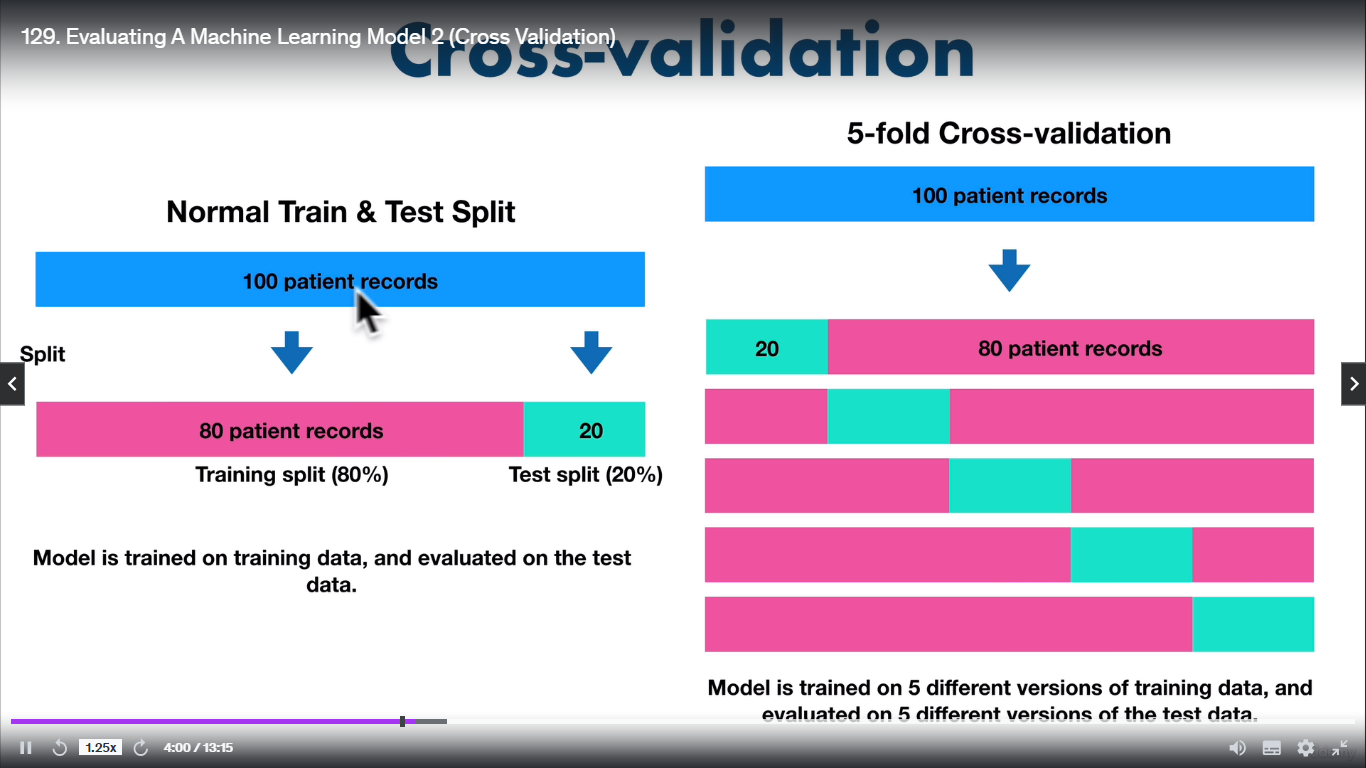

In [86]:
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "cross_val_score.png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


In [87]:
model.score(X_test, y_test)

0.8524590163934426

In [88]:
cross_val_score(model, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [89]:
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [90]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

# Compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [91]:
# Default scoring parameter of classifier = mean accuracy
# model.score()

In [92]:
# Scoring parameter set to None by default
cross_val_score(model, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [93]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier(n_estimators=100)
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))



In [94]:
np.mean(cross_val_score(model, X, y, cv=5))

0.8018032786885245

In [95]:
cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

In [96]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")


Heart Disease Classifier Cross-Validated Accuracy: 81.17%



**Area under the receiver operating characteristic curve (AUC/ROC)**

- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr):

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when t 1
th is 1

In [97]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
from sklearn.metrics import roc_curve

# Fit the classifier
model.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.04, 0.96],
        [0.65, 0.35],
        [0.17, 0.83],
        [0.99, 0.01],
        [0.19, 0.81],
        [0.16, 0.84],
        [0.51, 0.49],
        [0.92, 0.08],
        [0.44, 0.56],
        [0.25, 0.75]]),
 61)

In [99]:
# y_probs = model.predict(X_test)

# y_probs[:10], len(y_probs)

# the first column of the output of y_probs = model.predict_proba(X_test) is for 0 output

In [100]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.96, 0.35, 0.83, 0.01, 0.81, 0.84, 0.49, 0.08, 0.56, 0.75])

In [101]:
# Calculate fpr, tpr and thresholds
fpr, tpr , thresholds = roc_curve(y_test, y_probs_positive)
# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08695652,
       0.08695652, 0.13043478, 0.13043478, 0.17391304, 0.17391304,
       0.2173913 , 0.2173913 , 0.30434783, 0.34782609, 0.43478261,
       0.43478261, 0.47826087, 0.47826087, 0.56521739, 0.56521739,
       0.56521739, 0.60869565, 0.60869565, 0.7826087 , 1.        ])

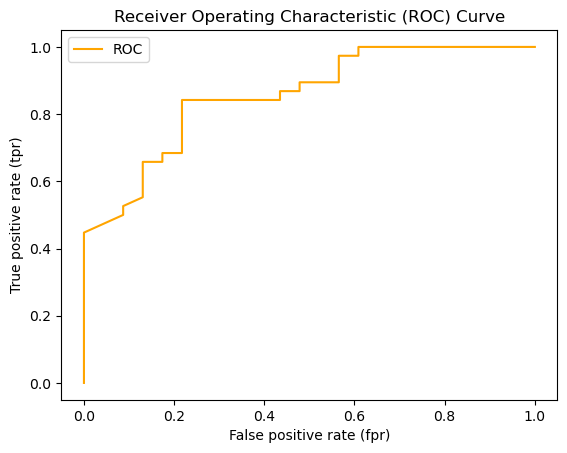

In [102]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing") #This line  would plot a diagonal line from (0,0) to (1,1).
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [103]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8552631578947368

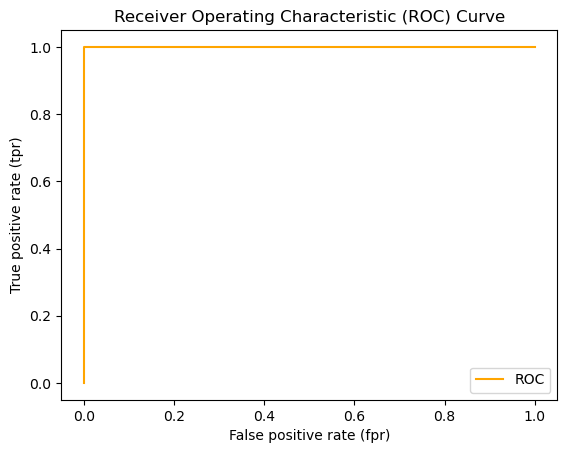

In [104]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [105]:
# Perfect AUC score
roc_auc_score(y_test, y_test)


1.0

In [106]:
# Reading Extension: ROC Curve + AUC
# When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. 
# But not to worry, with a little practice, they'll start to make sense.

# In a nutshell, what you should remember is:

# ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts 
# one thing or another, such as heart disease or not).

# The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

# The AUC metric tells you how well your model is at choosing between classes (for example,
# how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

# For more information on these metrics, bookmark the following resources and refer to them when you need:

# ROC and AUC, Clearly Explained! by StatQuest   https://www.youtube.com/watch?v=4jRBRDbJemM

# ROC documentation in Scikit-Learn (contains code examples) https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# How the ROC curve and AUC are calculated by Google's Machine Learning team https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc



**Confusion Matrix**
The next way to evaluate a classification model is by using a confusion matrix.     (https://en.wikipedia.org/wiki/Confusion_matrix)

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels 
it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [107]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[20,  3],
       [ 1, 37]], dtype=int64)

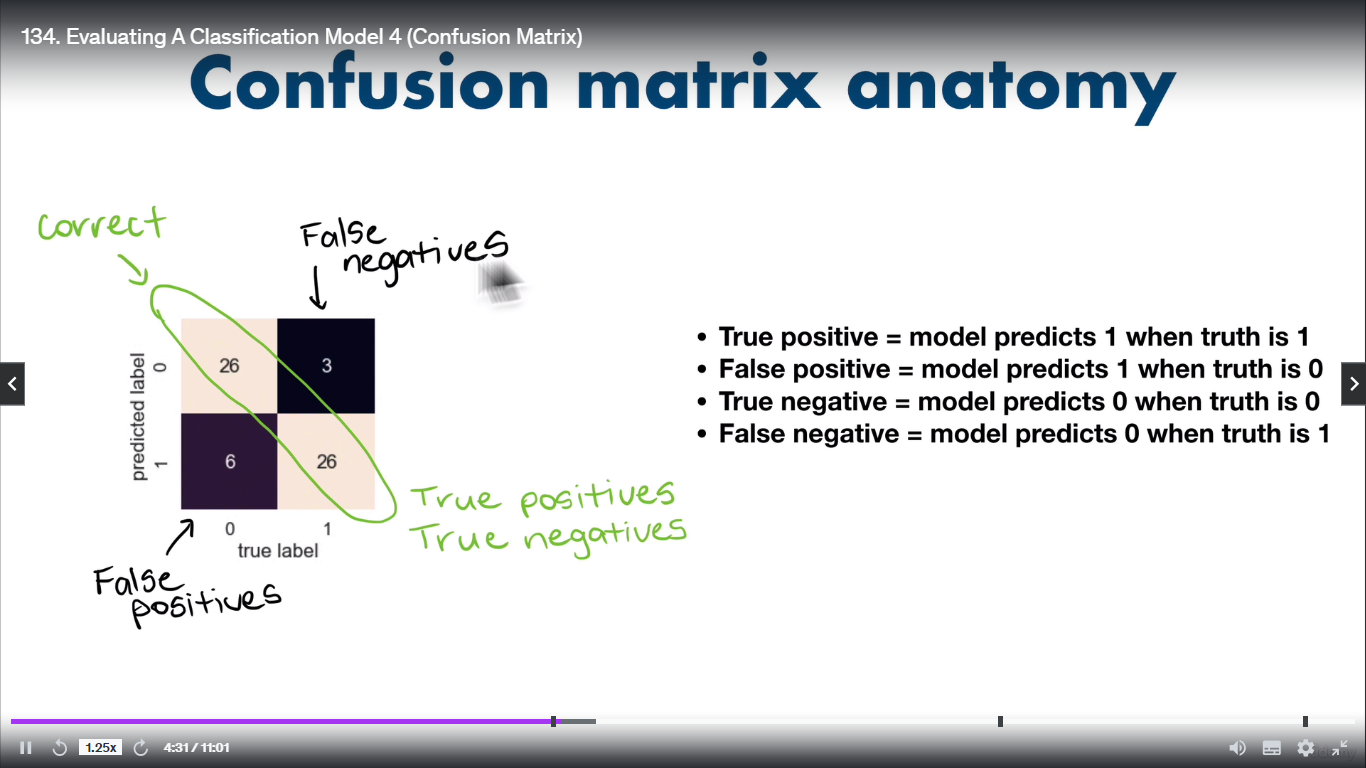

In [108]:
# Let us make it more visuallized as this image 
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "seaborn.png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


One way to do it is with `pd.crosstab()`

In [109]:
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,20,3
1,1,37


**Use of seaborn for confusion matrix**

<Axes: >

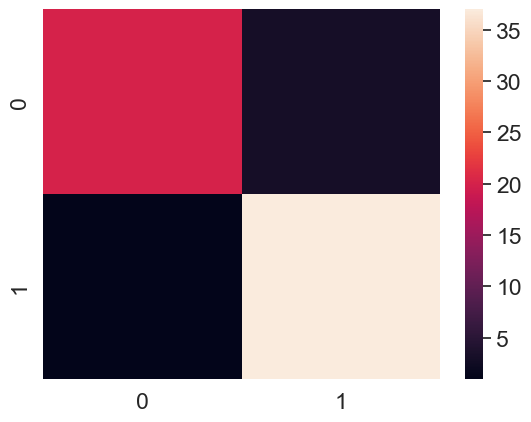

In [110]:
# Make our confusioon matrix more visual with Seaborn's heatmap()
import seaborn as sns
# Set the font scale 
sns.set(font_scale=1.5)
# Create a confusion matrix
conf_mat= confusion_matrix(y_test, y_preds)
# PLot it using Seaborn
sns.heatmap(conf_mat)

In [111]:
# Because it is not installed 
import sys 
!conda install --yes --prefix {sys.prefix} seaborn 

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



<Axes: >

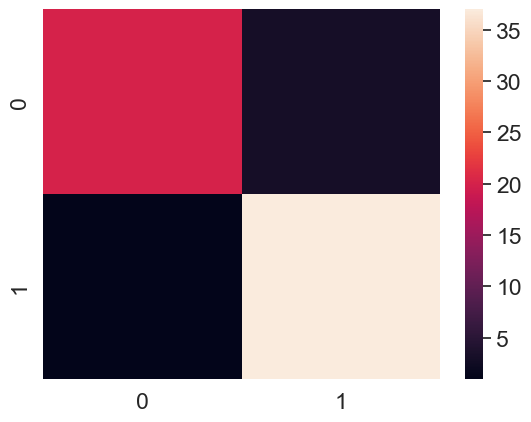

In [112]:
# Make our confusioon matrix more visual with Seaborn's heatmap()
import seaborn as sns
# Set the font scale 
sns.set(font_scale=1.5)
# Create a confusion matrix
conf_mat= confusion_matrix(y_test, y_preds)
# PLot it using Seaborn
sns.heatmap(conf_mat)
# It will pass because seaborn is now installed

## Creating a confusion matrix using scikit learn 
To use the new methods of creating a confusion matrix with Scikit-LEarn you will need sklearn version greater than 1.0
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html


In [113]:
import sklearn
sklearn.__version__    # syntax to check the actual version of sklearn
# https://scikit-learn.org/stable/install.html        Link where you can upgrade 

'1.4.2'

In [114]:
model

RandomForestClassifier()

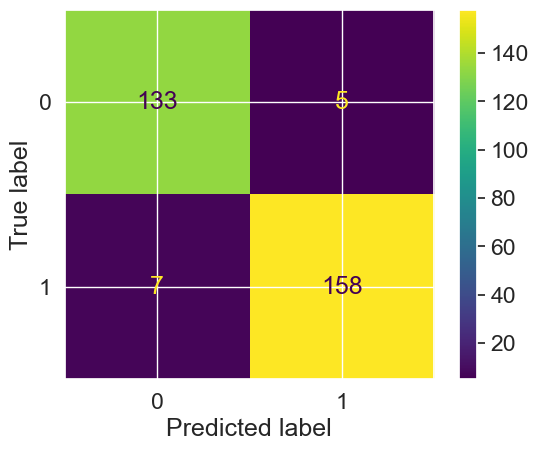

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)
# Let us note that here we are using X and y as parameters

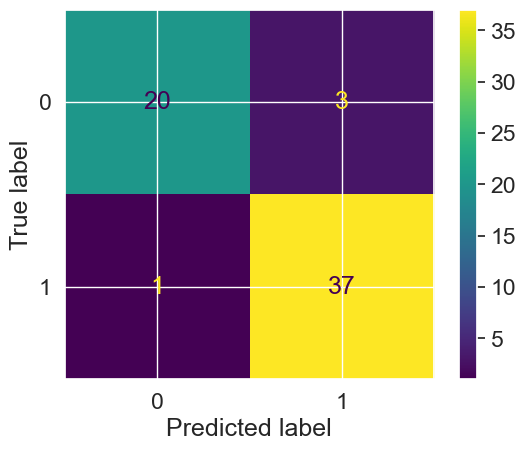

In [116]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                     y_pred = y_preds );
# And here we are using y_test and y_preds as parameters

**Classification Report**

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.93      0.97      0.95        38

    accuracy                           0.93        61
   macro avg       0.94      0.92      0.93        61
weighted avg       0.94      0.93      0.93        61



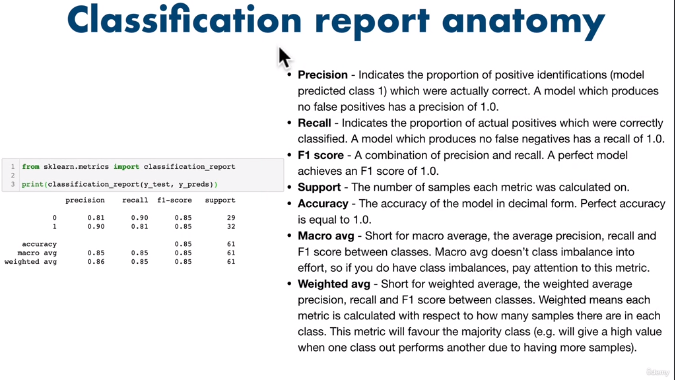

In [118]:
# Let us make it more visuallized as this image 
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "ClassificationReport.png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


In [119]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 # Only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(
    disease_true,
    disease_preds,
    output_dict=True
))

C:\Users\kevin\Desktop\sample_project\week1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kevin\Desktop\sample_project\week1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kevin\Desktop\sample_project\week1\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**To summarize classification metrics**:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
* 
R2 (pronounced r-squared) or coefficient of determinati
* n
Mean absolute error (M
*  E)
Mean squared error (M
R^2

**R^2**
What R-squared does: Compares your models predictions to the mean of the targets.
Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, 
it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [120]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)



RandomForestRegressor()

In [121]:
model.score(X_test, y_test)

0.8059837014172988

In [122]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [123]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [124]:
y_test.mean()

2.0550030959302323

In [125]:
from sklearn.metrics import r2_score
# Fill an array wit y_test mean
y_test_mean = np.full(len(y_test), y_test.mean()) # creatte a numpy array of lenght len(y_test) and fill each one with the value y_test.mean()
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [126]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [127]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [128]:
r2_score(
    y_true=y_test,
    y_pred=y_test
)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [129]:
# MAE
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32672061405038777

In [130]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.499090,0.022090
3024,0.45800,0.748150,0.290150
15663,5.00001,4.933456,-0.066554
20484,2.18600,2.569780,0.383780
9814,2.78000,2.346900,-0.433100
13311,1.58700,1.672960,0.085960
7113,1.98200,2.301510,0.319510
7668,1.57500,1.667750,0.092750
18246,3.40000,2.526490,-0.873510
5723,4.46600,4.860098,0.394098


In [131]:
df["differences"].mean()

0.011843612451549988

In [132]:
df["differences"].mean()
np.abs(df["differences"]).mean() # as we can see we are having the same output as the mean absolute error
# It is because that above is the formula used to calculate the mae . 
# we shall get the absolute value of the differences and get the mean of them

0.32672061405038777

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [133]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542406995878388

In [134]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [135]:
# Calculate MSE by hand
squared=np.square(df["differences"])
squared.mean()

0.2542406995878388

In [136]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"]=16  # increase "squared_differences" for 1 sample
df_large_error.head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_9072\3614480773.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"]=16  # increase "squared_differences" for 1 sample


,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,16.000000
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [137]:
df.head()


,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,0.000488
3024,0.45800,0.748150,0.290150,0.084187
15663,5.00001,4.933456,-0.066554,0.004429
20484,2.18600,2.569780,0.383780,0.147287
9814,2.78000,2.346900,-0.433100,0.187576


In [138]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20 # 1 to 100 for indexes and the 3  stands for the position of the column squared_differences
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.499090,0.022090,16.000000
3024,0.45800,0.748150,0.290150,20.000000
15663,5.00001,4.933456,-0.066554,20.000000
20484,2.18600,2.569780,0.383780,20.000000
9814,2.78000,2.346900,-0.433100,20.000000
...,...,...,...,...
15362,2.63300,2.209870,-0.423130,0.179039
16623,2.66800,1.938190,-0.729810,0.532623
18086,5.00001,4.835158,-0.164852,0.027176
2144,0.72300,0.717780,-0.005220,0.000027


In [139]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7342466472912547

# Machine Learning Model Evaluation

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

## Classification Model Evaluation Metrics/Techniques

### Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.


### Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct.
 A model which produces no false positives has a precision of 1.0.
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
 

### Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

### F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

### Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, 
all values in the matrix will be top left to bottom right (diagonal line).
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

### Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
https://scikit-learn.org/stable/modules/cross_validation.html

### Classification report - Sklearn has a built-in function called classification_report() 
which returns some of the main classification metrics such as precision, recall and f1-score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

### Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

#### Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

* R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets.
 Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, 
its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. 
It gives you an idea of how wrong your predictions were.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

* Mean squared error (MSE) - The average squared differences between predictions and actual values.
 Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. 
Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really 
tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, 
it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being  5,000 dollars off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being 5,000dollars off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

* Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)
  https://scikit-learn.org/stable/modules/model_evaluation.html

* Beyond Accuracy: Precision and Recall by Will Koehrsen
  https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

* Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)
https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832



## Evaluating our model is to compare its predictions to the ones it shall normally predicts
#### 4.2.3 Finally using the scoring parameter

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier(n_estimators=100)


In [141]:
np.random.seed(42) # np.random.seed(42)  is used because for example here we are using cv=5 and using that our dataset is splitted into 5sets
# As is shuffled or partitionned into 5 each time randomly . Using np.random.seed(42) help us to handle the random thingi :)

# Cross-validation accuracy
cv_acc = cross_val_score(model, X, y, cv=5, scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [142]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [143]:
np.random.seed(42)

cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")
cv_acc

# The scoring="accuracy" parameter specifies that the metric used to evaluate the model's performance is accuracy. 
# Accuracy is a common evaluation metric for classification tasks, and it measures the proportion of correctly classified
# instances out of the total instances.

# In the context of cross-validation, cv_acc would be a NumPy array containing the accuracy scores of each fold of the cross-validation.
# So, cv_acc would provide you insights into how well the classifier performs across different subsets of the data.
# You could then analyze these scores to understand the classifier's overall performance and its consistency across different subsets of the data.

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [144]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [145]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [146]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [147]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")
cv_recall


array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [148]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [150]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2

array([0.6202544 , 0.72010179, 0.62082435])

In [151]:
np.mean(cv_r2)

0.653726846238643

In [152]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse


array([-0.52497181, -0.34807246, -0.37397628, -0.44122708, -0.46338128])

In [153]:
np.mean(cv_mse)

-0.4303257834045092

In [154]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54332557, -0.4101009 , -0.43840433, -0.46642457, -0.47419896])

In [155]:
np.mean(cv_mae)

-0.4664908631250001

### 4.3 Using different evaluation metrics as Scikit-Learn functions
The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestClassifier()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
# y_test is the correct predictions that the model shall target
# and y_preds is the output of the model  when trying to predict
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [157]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
# y_test is the correct predictions that the model shall target
# and y_preds is the output of the model  when trying to predict
print("Regression metrics on the test set")
print(f"R2 Score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAS: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R2 Score: 51.06%
MAS: 0.23754098360655734
MSE: 0.12204426229508197


In [158]:
# And aslo note that the training using the cross valaidation will take longer than the ones that we just did
# Because with cross valaidation THE DATASET is doing splitting more than one time

## 5. Improving model
First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
*  Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

rnsn1. By hand
2. Randomly with Rando
* By hand
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCv

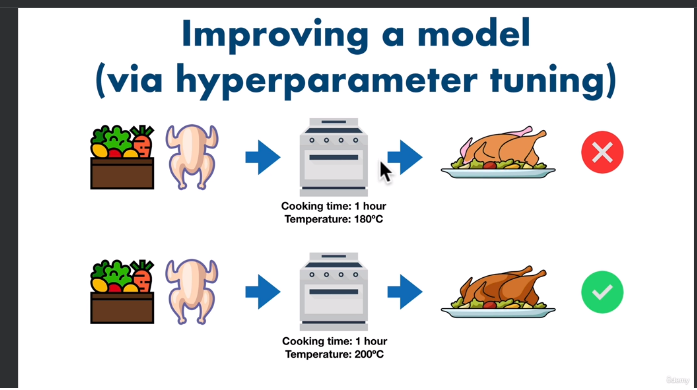

In [159]:
# Let us make it more visuallized as this image 
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "HyparametersExplanation.png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


In [160]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

In [161]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

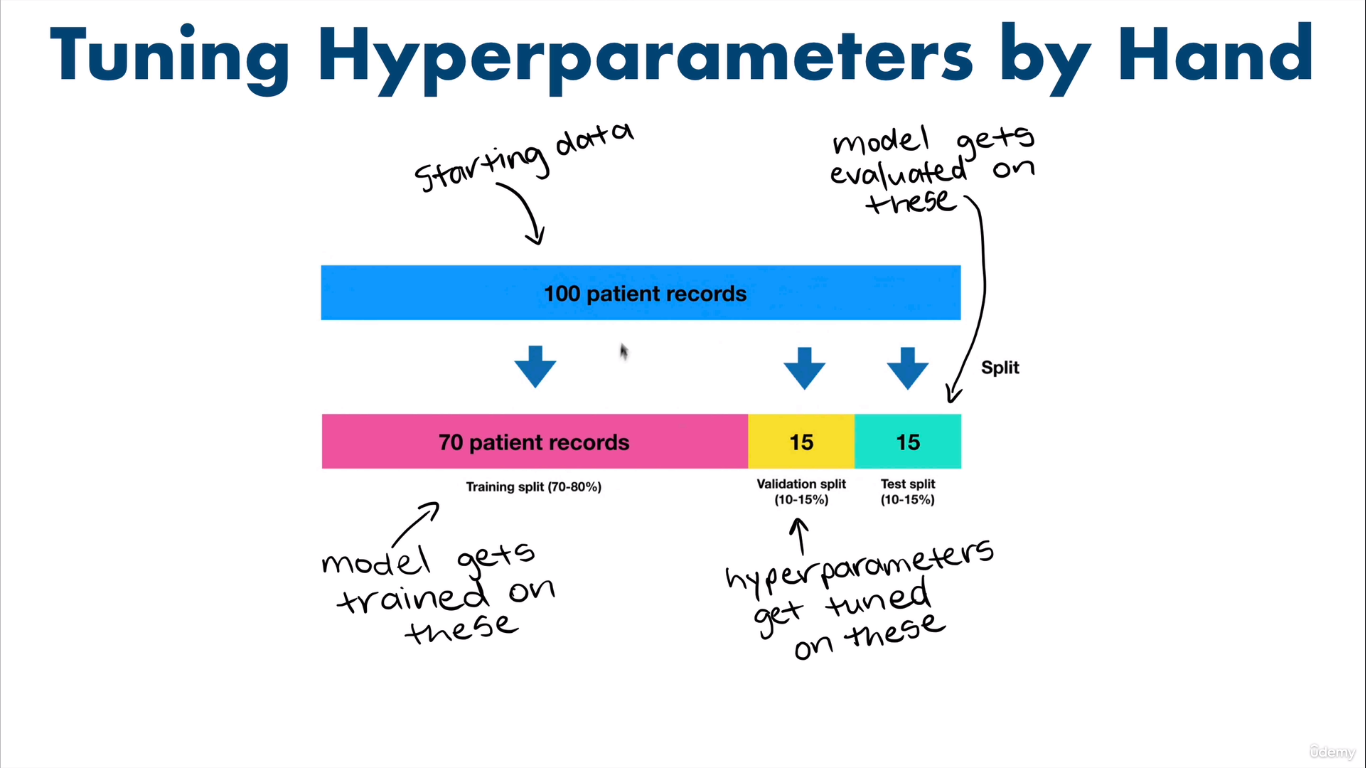

In [162]:
# Let us make it more visuallized as this image 
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "HyperParameterByHands.png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


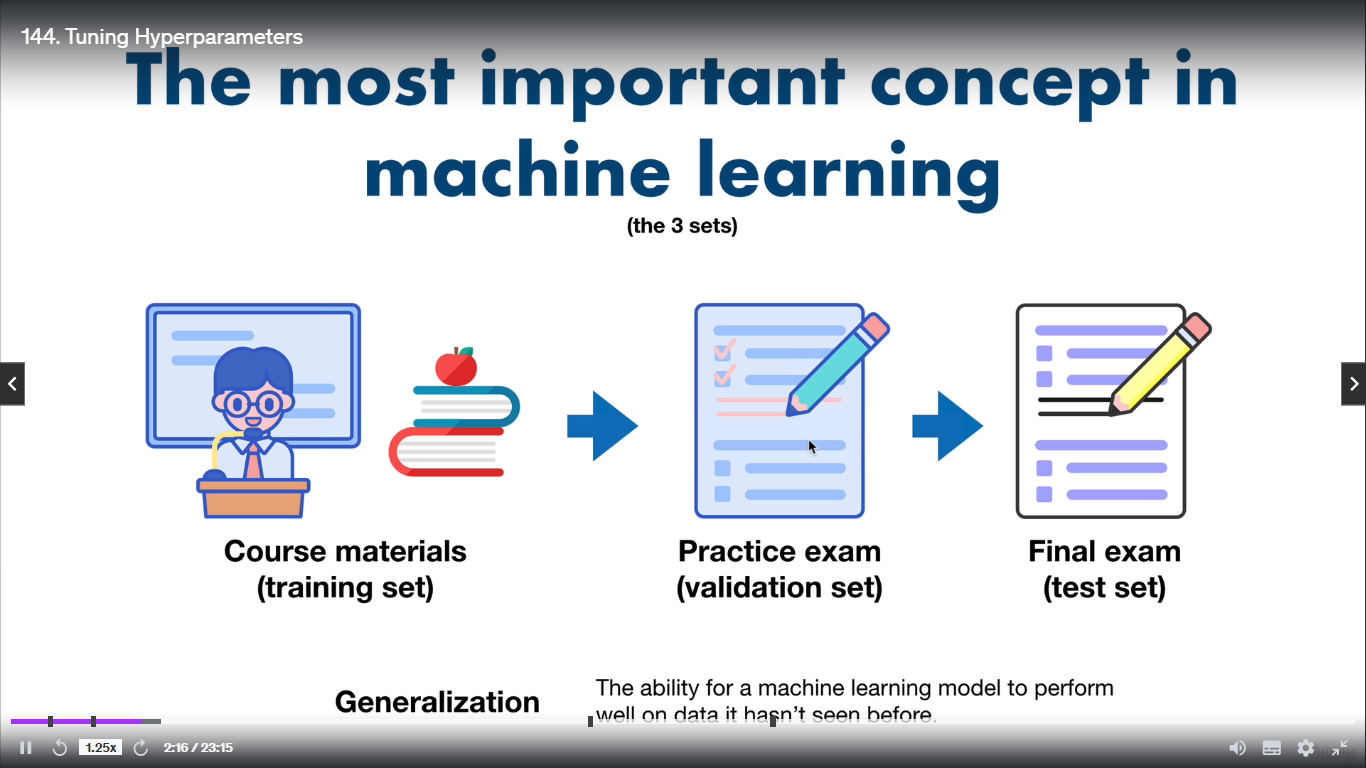

In [163]:
# Let us make it more visuallized as this image 
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "3-sets.png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


In [164]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_split`
* `n_estimators`
* `min_samples_leaf`



In [165]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [166]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data it is the amount that need to be trained
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]
print(len(X_train), len(X_valid), len(X_test))

# Read the cell below to get how the data is set

212 45 46


In [167]:
# Certainly! Let's break down the code and its purpose step by step:

# ```python
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# np.random.seed(42)

# # Shuffle the data
# heart_disease_shuffled = heart_disease.sample(frac=1)

# # Split into X & y
# X = heart_disease_shuffled.drop("target", axis=1)
# y = heart_disease_shuffled["target"]

# # Split the data into train, validation & test sets
# train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data for training
# valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  # 15% of data for validation
# X_train, y_train = X[:train_split], y[:train_split]
# X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
# X_test, y_test = X[valid_split:], y[valid_split:]
# print(len(X_train), len(X_valid), len(X_test))
# ```

# ### Explanation:

# 1. **Imports and Seed Initialization**:
#    - `from sklearn.ensemble import RandomForestClassifier`: Imports the RandomForestClassifier from scikit-learn, which will likely be used for training a classification model.
#    - `import numpy as np`: Imports NumPy, a fundamental package for scientific computing in Python.
#    - `np.random.seed(42)`: Sets the random seed to ensure reproducibility. This means that every time you run this code, you'll get the same random sequence, which is important for reproducible research.

# 2. **Shuffling the Data**:
#    - `heart_disease_shuffled = heart_disease.sample(frac=1)`: Shuffles the `heart_disease` DataFrame by sampling all rows (`frac=1`). This randomizes the order of rows in the DataFrame to remove any inherent ordering biases.

# 3. **Splitting into Features (X) and Target (y)**:
#    - `X = heart_disease_shuffled.drop("target", axis=1)`: Extracts the features (independent variables) from the shuffled DataFrame `heart_disease_shuffled`. Here, `.drop("target", axis=1)` removes the column named "target" to create `X`, which contains all other columns.
#    - `y = heart_disease_shuffled["target"]`: Extracts the target variable (dependent variable) from `heart_disease_shuffled`. This column represents the labels or classes you want to predict.

# 4. **Splitting into Train, Validation, and Test Sets**:
#    - `train_split = round(0.7 * len(heart_disease_shuffled))`: Calculates the index to split the data into training and validation sets. Here, 70% of the shuffled data (`heart_disease_shuffled`) is designated for training.
#    - `valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))`: Calculates the index to split between validation and test sets. 15% of the data is allocated for validation (`X_valid`, `y_valid`), and the remaining for testing (`X_test`, `y_test`).
#    - `X_train, y_train = X[:train_split], y[:train_split]`: Slices `X` and `y` to create training data based on `train_split`.
#    - `X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]`: Slices `X` and `y` to create validation data based on `valid_split`.
#    - `X_test, y_test = X[valid_split:], y[valid_split:]`: Slices `X` and `y` to create test data. This ensures no overlap between training, validation, and test sets.

# 5. **Output**:
#    - `print(len(X_train), len(X_valid), len(X_test))`: Prints the lengths of `X_train`, `X_valid`, and `X_test` to verify the sizes of the split datasets.

# ### Purpose:

# The purpose of this code snippet is to prepare the data for training and evaluating a machine learning model, typically a RandomForestClassifier from scikit-learn:

# - **Random Shuffling**: Ensures that the data is randomly ordered to prevent any bias during training and evaluation.
# - **Data Splitting**: Divides the shuffled data into three distinct sets:
#   - **Training Set (`X_train`, `y_train`)**: Used to train the machine learning model.
#   - **Validation Set (`X_valid`, `y_valid`)**: Used to tune model hyperparameters and evaluate model performance during training.
#   - **Test Set (`X_test`, `y_test`)**: Used to provide an unbiased evaluation of the final model after tuning.

# By following these steps, you ensure that your machine learning model is trained on a representative sample of data, validated properly, and tested rigorously to provide reliable performance metrics. This methodology helps in building robust and generalizable machine learning models.

In [168]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)   # evaluate_preds is the function that we created above 
baseline_metrics


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [169]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [170]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        # "max_features": ["auto", "sqrt"], # in the curent version, we can not define auto as value so let us not use it 
        "max_features": ["log2", "sqrt"], # As we can see running this model doesn't give us a warning anymore
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # here we can ask yourself why we are splitting in 2 sets . It is because 
# we will use cv that's why

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)
# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, # here we are assigning our dictionary 
                            n_iter=10, # number of models to try , more u increase the nnumber more it can random and test a lot of models
                            cv=5,
                            verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [171]:
# The warning you're seeing is from scikit-learn's `model_selection` module, specifically during a cross-validation process. Here's what's happening:

# 1. The code is performing a cross-validation procedure (likely GridSearchCV or RandomizedSearchCV) on a RandomForestClassifier model.
# 2. During the cross-validation, there were 20 failures out of a total of 50 train-test splits.
# 3. These failures occurred because the `max_features` parameter of the RandomForestClassifier was set to 'auto', which is an invalid value. `max_features` should be an integer in the range [1, inf), a float in the range (0.0, 1.0], a string among {'log2', 'sqrt'}, or None.
# 4. When a failure occurs during a cross-validation split, scikit-learn sets the score for that split to `nan` (Not a Number).
# 5. The warning `FitFailedWarning` is raised to inform you that 20 fits failed, and their scores were set to `nan`.
# 6. The second warning `UserWarning` is raised because some of the test scores are non-finite (`nan` in this case), which can cause issues in downstream operations like scoring or model selection.

# To resolve this issue, you need to set a valid value for the `max_features` parameter of the RandomForestClassifier. You can try setting it to a specific integer value, a float value between 0 and 1 (representing the fraction of features to consider), 'sqrt' (square root of the number of features), or 'log2' (base-2 logarithm of the number of features).

# Alternatively, if you want to debug the failures, you can set `error_score='raise'` in the cross-validation function (e.g., `GridSearchCV` or `RandomizedSearchCV`). This will raise an error instead of setting the score to `nan`, allowing you to inspect the traceback and potentially identify the root cause of the issue.

The `n_jobs` parameter in scikit-learn's `RandomForestClassifier` (and similar estimators) specifies the number of parallel jobs (threads) to use for training the model. This parameter can significantly impact the training time of the model, especially when dealing with large datasets or when training complex models like random forests.

### Explanation of `n_jobs`

1. **Single-Threaded (Default)**:
   - By default, `n_jobs` is set to `None` or `1`, which means the model will train using a single thread. This is suitable for smaller datasets or when running the model on a single-core CPU.

2. **Multi-Threaded or Parallel Training**:
   - Setting `n_jobs` to a value greater than `1` instructs scikit-learn to use multiple threads (or processes) for training the model. This can significantly speed up the training process, especially on multi-core CPUs.

3. **Special Cases**:
   - **`n_jobs = -1`**: This setting uses all available CPU cores. It is useful when you want scikit-learn to automatically detect and utilize all the cores available on your machine.
   
   - **`n_jobs > 1`**: Specifies the exact number of cores to use. For instance, `n_jobs = 2` would use two cores for training.

4. **Impact**:
   - **Speed**: Using multiple cores can speed up the training process, especially for large datasets or complex models like random forests, where each tree can be built independently.
   
   - **Memory Usage**: Be cautious with large `n_jobs` values as they may increase memory usage proportionally. Each job/thread typically requires its own memory space.

5. **Usage**:
   - Generally, you would set `n_jobs` based on the resources available on your machine and the size of your dataset. For smaller datasets, the default (`n_jobs = 1`) may suffice, while larger datasets may benefit from parallelization (`n_jobs > 1` or `n_jobs = -1`).

### Example

```python
from sklearn.ensemble import RandomForestClassifier

# Using all available cores
clf = RandomForestClassifier(n_jobs=-1)

# Using 2 cores
clf = RandomForestClassifier(n_jobs=2)

# Using single core (default)
clf = RandomForestClassifier(n_jobs=1)
```

### Summary

In summary, `n_jobs` in scikit-learn's `RandomForestClassifier` controls the parallelization of the model training process. It allows you to leverage multiple CPU cores to speed up training, making it a useful parameter when dealing with large datasets or when optimizing training time. The choice of `n_jobs` should be based on the computational resources available and the characteristics of the dataset being used.

In [172]:
rs_clf.best_params_  # here we determine the best parameters to use: that is the output that will be given


{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [173]:
# After this, those above parameters will be assigned to rs_clf 

# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [174]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['log2', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [175]:
from sklearn.model_selection import GridSearchCV
# Note something also , grid-2 parameters have been determined based on the best paramsnof rs_clf
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['log2', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]} 
# here we are creating a new dictionary because if we use grid 
# It shall do many computations (allow me to say like that ) 6*5*2*3*3*5 = 2700 It is a lot to handle
# In case of grid_2 we have 3*1*2*1*2*5 =  the last 5 just represwent that we will use cv = 5
# The more parameters we are having in our dictionary the more that it will take in time

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # here we can ask yourself why we are splitting in 2 sets . It is because 
# we will use cv that's why

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)
# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2)
# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

In [176]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [177]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


Let's compare our different model metrics

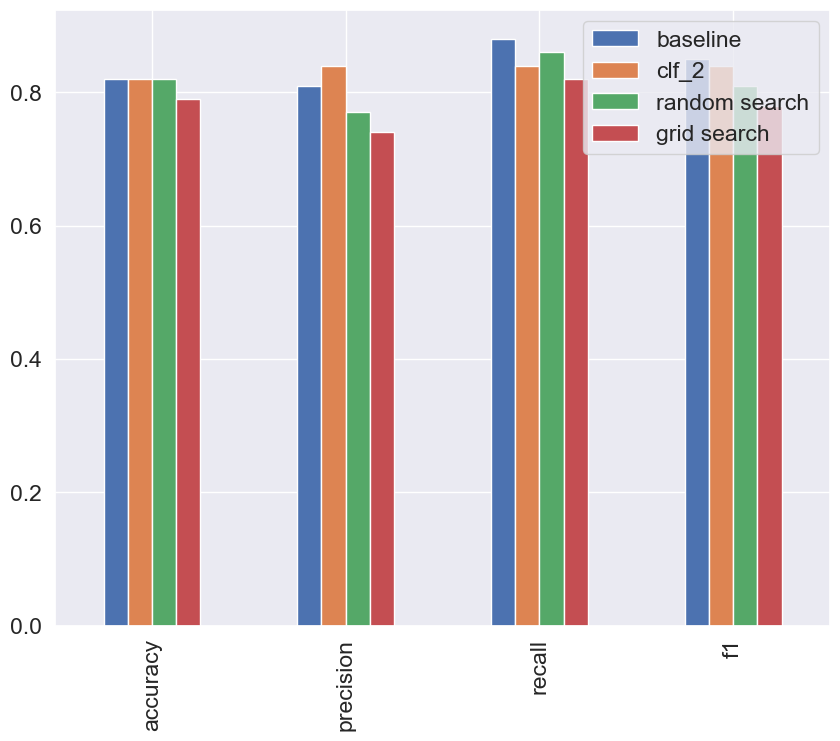

In [178]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, 
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

### 6. Saving and loading trained machine learning models
Two ways to save and load machine learning models:

* With Python's `pickle` module https://docs.python.org/3/library/pickle.html
* With the `joblib` module https://joblib.readthedocs.io/en/stable/

**Pickle**

In [179]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [180]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [181]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [182]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [183]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [185]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)


# https://scikit-learn.org/stable/model_persistence.html

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### 7. Putting it all together!

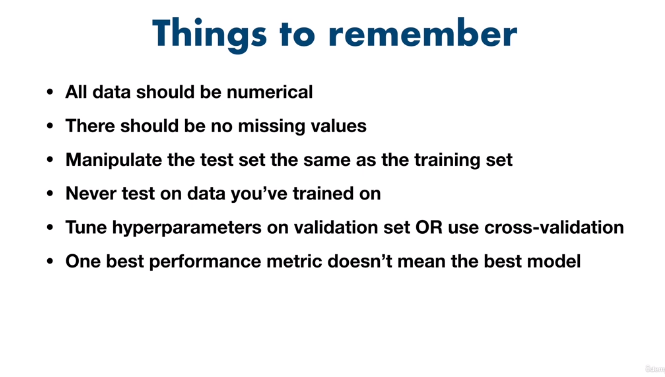

In [186]:
# Let us make it more visuallized as this image 
# from IPython.display import image, display

# # Replace 'filename.svg' with the path to your SVG file
# display((filename="c"))
from IPython.display import Image

# Specify the file path of your image
image_path = "Screenshot (18).png"  # Change this to the path of your image file

# Display the image
Image(filename=image_path)


In [187]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [188]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [189]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data 

In [194]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [195]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [ ]:
# Score the best model
gs_model.score(X_test, y_test)

Beautiful!

Using GridSearchCV we see a nice boost in our models score.

And the best thing is, because it's all in a Pipeline, we could easily replicate these results.

Where to next?
If you've made it this far, congratulations! We've covered a lot of ground in the Scikit-Learn library.

As you might've guessed, there's a lot more to be discovered.
     
But for the time being, you should be equipped with some of the most useful features of the library to start trying to apply them to your own problems.

Somewhere you might like to look next is to apply what you've learned above to a Kaggle competition. `https://www.kaggle.com/`

Kaggle competitions are great places to practice your data science and machine learning skills and compare your results with others.

A great idea would be to try to combine the heart disease classification code, as well as the Pipeline code, to build a model for the Titanic dataset.
`https://www.kaggle.com/c/titanic`

Otherwise, if you'd like to figure out what else the Scikit-Learn library is capable of I'd highly recommend browsing through 
the Scikit-Learn User Guide `https://scikit-learn.org/stable/user_guide.html` and seeing what sparks your interest.

Finally, as an extra-curriculum extension, you might want to look into trying out the CatBoost library `https://catboost.ai/`
for dealing with non-numerical data automatically.

The CatBoost algorithm is advanced version of a decision tree (like a Random Forest with superpowers) 
and is used in production at several large technology companies, including Cloudflare. `https://blog.cloudflare.com/how-cloudflare-runs-ml-inference-in-microseconds/`